In [305]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [306]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [307]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [308]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [309]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
new_df_market_data_df = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h",	"price_change_percentage_7d",	"price_change_percentage_14d",	"price_change_percentage_30d",	"price_change_percentage_60d",	"price_change_percentage_200d",	"price_change_percentage_1y"]]
    )


In [310]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    new_df_market_data_df,
    columns=[["price_change_percentage_24h",	"price_change_percentage_7d",	"price_change_percentage_14d",	"price_change_percentage_30d",	"price_change_percentage_60d",	"price_change_percentage_200d",	"price_change_percentage_1y"]]
    )

# Copy the crypto names from the original data
market_data_scaled_df["Ticker"] = df_market_data.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index("Ticker")

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Ticker,,,,,,,
"(bitcoin,)",0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
"(ethereum,)",0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
"(tether,)",0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
"(ripple,)",-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
"(bitcoin-cash,)",1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [311]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [312]:
# Create an empty list to store the inertia values
inertia = []

for k in k_values:
    
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using df_market_data_scaled
    kmeans_model.fit(market_data_scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)


In [313]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

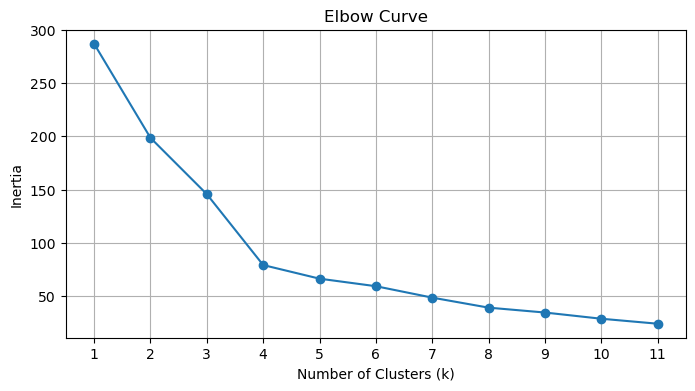

In [314]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the line chart
plt.figure(figsize=(8, 4))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(df_elbow["k"])
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [315]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=5)

In [316]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

KMeans(n_clusters=5)

In [317]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(market_data_scaled_df)

# Print the resulting array of cluster values.
print(crypto_clusters)

[1 1 4 4 1 1 1 1 1 4 4 4 4 1 4 1 4 4 1 4 4 1 4 4 4 4 4 4 1 2 4 4 3 1 4 4 0
 4 4 4 4]


In [318]:
# Create a copy of the DataFrame
copy_market_data_scaled_df = market_data_scaled_df.copy()

In [319]:
# Add a new column to the DataFrame with the predicted clusters
copy_market_data_scaled_df["CryptoClusters"] = crypto_clusters

# Display sample data
copy_market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoClusters
Ticker,,,,,,,,
"(bitcoin,)",0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
"(ethereum,)",0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
"(tether,)",0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,4
"(ripple,)",-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,4
"(bitcoin-cash,)",1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [320]:
# Add the predicted clusters to the DataFrame
market_data_scaled_df["CryptoClusters"] = crypto_clusters

# Reset the index to have a numerical index (if not done already)
market_data_scaled_df.reset_index(inplace=True)

# Rename the "Ticker" column to a string (if not done already)
market_data_scaled_df.rename(columns={"Ticker": "coin_id"}, inplace=True)

# Flatten the column names (convert tuple column names to strings)
market_data_scaled_df.columns = [col[0] if isinstance(col, tuple) else col for col in market_data_scaled_df.columns]

# Convert the coin_id column from tuple to string
market_data_scaled_df['coin_id'] = market_data_scaled_df['coin_id'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Print the DataFrame to inspect the result
print(market_data_scaled_df.head())
print(market_data_scaled_df.columns)

# Convert columns to numeric and handle non-numeric values
columns_to_convert = [
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y',
    'CryptoClusters'
]

for column in columns_to_convert:
    market_data_scaled_df[column] = pd.to_numeric(market_data_scaled_df[column], errors='coerce')

# Drop rows with missing values
market_data_scaled_df.dropna(inplace=True)

# Print the DataFrame to inspect the result
print(market_data_scaled_df.head())
print(market_data_scaled_df.dtypes)

# Create the scatter plot using hvPlot
scatter_plot = market_data_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="CryptoClusters",
    hover_cols=["coin_id"]
)

# Display the scatter plot
scatter_plot


        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                     0.508529                    0.493193   
1      ethereum                     0.185446                    0.934445   
2        tether                     0.021774                   -0.706337   
3        ripple                    -0.040764                   -0.810928   
4  bitcoin-cash                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483      

:NdOverlay   [CryptoClusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [321]:
print(market_data_scaled_df.columns)


Index(['coin_id', 'price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'CryptoClusters'],
      dtype='object')


---

### Optimize Clusters with Principal Component Analysis.

In [322]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(market_data_scaled_df[[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]])

# Create a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Add the CryptoClusters and coin_id back to the PCA DataFrame
pca_df['CryptoClusters'] = market_data_scaled_df['CryptoClusters'].values
pca_df['coin_id'] = market_data_scaled_df['coin_id'].values

# Display the PCA DataFrame
print(pca_df.head())



       PCA1      PCA2      PCA3  CryptoClusters       coin_id
0 -0.600667  0.842760  0.461595               1       bitcoin
1 -0.458261  0.458466  0.952877               1      ethereum
2 -0.433070 -0.168126 -0.641752               4        tether
3 -0.471835 -0.222660 -0.479053               4        ripple
4 -1.157800  2.041209  1.859715               1  bitcoin-cash


In [323]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 


In [324]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(market_data_scaled_df[[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]])

# Retrieve the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = explained_variance_ratio.sum()

# Create a DataFrame to display the explained variance
explained_variance_df = pd.DataFrame({
    'Principal Component': ['PCA1', 'PCA2', 'PCA3'],
    'Explained Variance Ratio': explained_variance_ratio
})

# Display the explained variance DataFrame
print(explained_variance_df)

# Print the total explained variance
print(f'Total Explained Variance: {total_explained_variance}')

# Optionally, visualize the explained variance ratio
explained_variance_plot = explained_variance_df.hvplot.bar(
    x='Principal Component',
    y='Explained Variance Ratio',
    ylim=(0, 1),
    title='Explained Variance Ratio of Principal Components'
)

# Display the plot
explained_variance_plot


  Principal Component  Explained Variance Ratio
0                PCA1                  0.371986
1                PCA2                  0.347008
2                PCA3                  0.176038
Total Explained Variance: 0.8950316570309842


:Bars   [Principal Component]   (Explained Variance Ratio)

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**0.8950316570309842:** 

In [325]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data

from sklearn.decomposition import PCA

# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_data = pca.fit_transform(market_data_scaled_df[[
    'price_change_percentage_24h',
    'price_change_percentage_7d',
    'price_change_percentage_14d',
    'price_change_percentage_30d',
    'price_change_percentage_60d',
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]])

# Create a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_scaled_df['coin_id'].values

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())



                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [326]:
# Create a list with the number of k-values from 1 to 11


In [327]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using pca_df
    kmeans_model.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Plot the Elbow curve using hvPlot
elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    title='Elbow Curve',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

# Display the Elbow plot
elbow_plot


:Curve   [k]   (inertia)

In [328]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [329]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 2**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: Yes** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [330]:
# Initialize the K-Means model using the best value for k


In [331]:
# Fit the K-Means model using the PCA data

In [332]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [333]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [334]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


In [335]:
from sklearn.cluster import KMeans
import hvplot.pandas

# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=4, random_state=0)
kmeans_pca.fit(pca_df)

# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values
print(pca_clusters)

# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_clusters

# Display sample data
print(pca_df_copy.head())

# Create a scatter plot using hvPlot by setting x="PCA1" and y="PCA2"
# Color the graph points with the labels found using K-Means
# Add the crypto name in the hover_cols parameter to identify the cryptocurrency represented by each data point
scatter_plot_pca = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters Using PCA Data'
)

# Display the scatter plot
scatter_plot_pca


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]
                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        2
ethereum     -0.458261  0.458466  0.952877        2
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        2


:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [336]:
# Composite plot to contrast the Elbow curves

In [337]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 